# Shopping Trends Analysis

### Import `libraries/modules` for analysis 

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import and store the `shopping_trends_updated.csv` file in a variable with `*Customer ID*` column as the index column

In [214]:
shop_trend_df = pd.read_csv ("shopping_trends_updated.csv" , index_col= "Customer ID")
shop_trend_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Display new DataFrame information to determine how many entries, columns and null values are present

In [215]:
shop_trend_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 1 to 3900
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3900 non-null   int64  
 1   Gender                  3900 non-null   object 
 2   Item Purchased          3900 non-null   object 
 3   Category                3900 non-null   object 
 4   Purchase Amount (USD)   3900 non-null   int64  
 5   Location                3900 non-null   object 
 6   Size                    3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

### Check for duplicate rows within the DataFrame

In [216]:
shop_trend_df.duplicated().sort_values()

Customer ID
1       False
2593    False
2594    False
2595    False
2596    False
        ...  
1306    False
1307    False
1308    False
1280    False
3900    False
Length: 3900, dtype: bool

### Remove any outliers from DataFrame

In [217]:
sorted_shop_trend_df = shop_trend_df.sort_values("Purchase Amount (USD)", ascending=False)
sorted_shop_trend_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
2843,28,Female,Coat,Outerwear,100,Arizona,L,Green,Fall,4.3,No,Standard,No,No,48,Debit Card,Quarterly
96,37,Male,Sneakers,Footwear,100,Missouri,L,Pink,Fall,3.8,Yes,Free Shipping,Yes,Yes,48,PayPal,Monthly
582,32,Male,Sweater,Clothing,100,Iowa,XL,Charcoal,Winter,2.7,Yes,Store Pickup,Yes,Yes,12,Bank Transfer,Every 3 Months
1422,68,Male,Dress,Clothing,100,Pennsylvania,S,Gold,Spring,3.0,No,Standard,Yes,Yes,24,Bank Transfer,Fortnightly
3838,45,Female,Hoodie,Clothing,100,New Mexico,M,Green,Spring,4.8,No,Free Shipping,No,No,33,Bank Transfer,Fortnightly


In [218]:
sorted_shop_trend_df = shop_trend_df.sort_values("Purchase Amount (USD)")
sorted_shop_trend_df.head()

,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,,,,,,,,,,,,,,,,,
2697,57,Female,Coat,Outerwear,20,South Dakota,M,White,Spring,4.7,No,Free Shipping,No,No,12,Debit Card,Monthly
3654,67,Female,Coat,Outerwear,20,Minnesota,M,Blue,Spring,3.9,No,Next Day Air,No,No,39,Credit Card,Fortnightly
3084,22,Female,Pants,Clothing,20,Illinois,S,Purple,Summer,3.5,No,Store Pickup,No,No,28,PayPal,Quarterly
2653,23,Female,Shorts,Clothing,20,Maryland,L,Cyan,Summer,3.3,No,2-Day Shipping,No,No,46,Credit Card,Monthly
1796,68,Male,Jeans,Clothing,20,Wisconsin,S,Violet,Fall,4.0,No,2-Day Shipping,No,No,9,Debit Card,Fortnightly


## Data Visualization with Matplotlib

##  Visualize the **frequency of Item Purchased**, to determine which items are most commonly purchased

### Determine the frequency of items purchased

In [219]:
item_purchase_frequency = shop_trend_df ["Item Purchased"].value_counts()
item_purchase_frequency

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

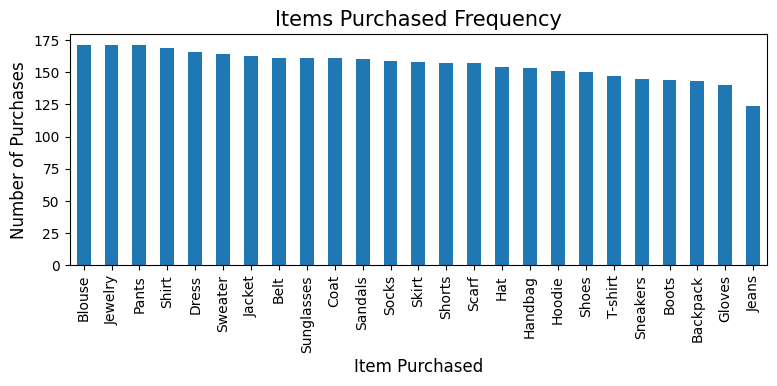

In [220]:
item_purchase_frequency.plot.bar (figsize = (9,3));
plt.title ("Items Purchased Frequency", fontsize = 15);
plt.xlabel ("Item Purchased", fontsize = 12);
plt.ylabel ("Number of Purchases", fontsize = 12);

### Determine the **frequency of gender purchases**

In [221]:
gender_purchase_frequency = shop_trend_df ["Gender"].value_counts()
gender_purchase_frequency

Male      2652
Female    1248
Name: Gender, dtype: int64

### Use a **Bar Graph** to visualize this data using an X and Y axis and Title

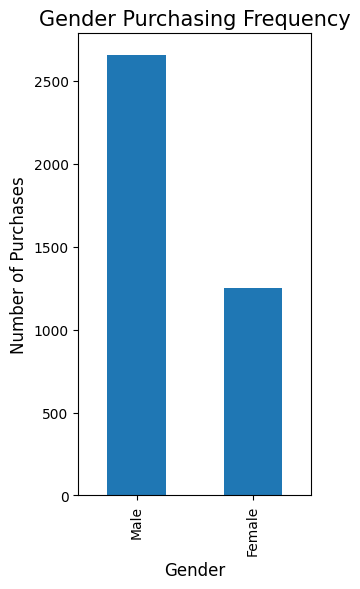

In [222]:
gender_purchase_frequency.plot.bar (figsize = (3,6));
plt.title ("Gender Purchasing Frequency" , fontsize = 15);
plt.xlabel ("Gender" , fontsize = 12);
plt.ylabel ("Number of Purchases" , fontsize = 12);

### Determine the **frequency of previous purchases**

In [223]:
previous_purchase_frequency = shop_trend_df ["Previous Purchases"].value_counts().sort_values()
previous_purchase_frequency

49    58
35    63
43    64
9     65
22    65
7     65
17    67
8     67
13    69
29    69
38    70
16    70
41    70
36    71
2     72
44    72
23    73
15    73
10    76
50    77
26    77
46    78
37    78
27    78
19    78
25    79
12    79
34    79
28    80
32    81
39    81
40    82
33    82
11    82
30    82
45    83
20    83
1     83
42    83
18    84
6     87
5     87
47    90
48    90
4     91
3     91
24    91
14    92
21    96
31    97
Name: Previous Purchases, dtype: int64

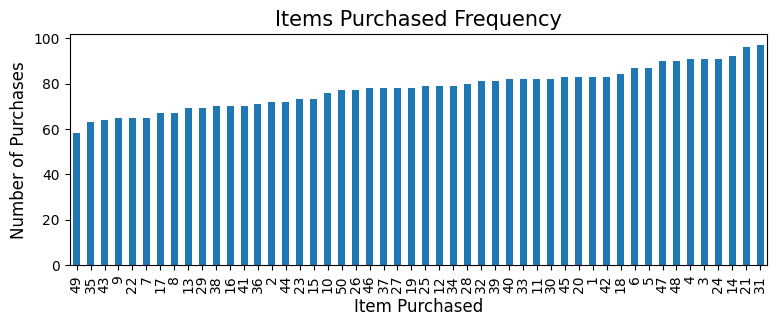

In [224]:
previous_purchase_frequency.plot.bar (figsize = (9,3));
plt.title ("Prevoious Purchases Frequency", fontsize = 15);
plt.xlabel ("Previous Purchases", fontsize = 12);
plt.ylabel ("Number of People", fontsize = 12);